### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [21]:
# Import necessary libraries, packages and classes.
import pandas as pd
import math
import numpy as np
import statsmodels.stats.api as sms
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from statsmodels.stats.power import TTestIndPower
from scipy.stats import sem
import seaborn as sns
# The statsmodels
import statsmodels.api as sm 
from statsmodels.formula.api import ols
# Note: Indicates situations that aren’t necessarily exceptions.
import warnings  
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import datasets 
import numpy as np
from sklearn import linear_model

from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE  
import statsmodels.api as sm   
import imblearn  
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/kay/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/_param_validation.py)

In [5]:
# Load the CSV file(s) as reviews.
df_tut = pd.read_csv('turtle_reviews.csv')
# View the DataFrame.
df_tut.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [40]:
df_tut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [41]:
# check for missing values
df_tut.isna().sum()


gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [48]:
# Explore the gender distribution.
df_tut['gender'].value_counts()

Female    1120
Male       880
Name: gender, dtype: int64

In [6]:
##explore the data
#Creats a subset
df_subb = df_tut[['age', 'remuneration (k£)', 'spending_score (1-100)']]
#Group df_subb by age and get the mean of the numerical col
new= df_subb.groupby(['age'], sort=True).mean()
#sort by remuneration and spending score
spend_group = new.sort_values(by=['remuneration (k£)','spending_score (1-100)'], ascending=False)
#convert to a df
spend = pd.DataFrame(spend_group)
spend.head(6)

remuneration (k£)  spending_score (1-100)
age                                           
34           65.995091               61.972727
55           63.386000               34.200000
36           61.401600               43.200000
35           61.172000               52.900000
42           61.090000               22.600000
32           59.964364               69.763636

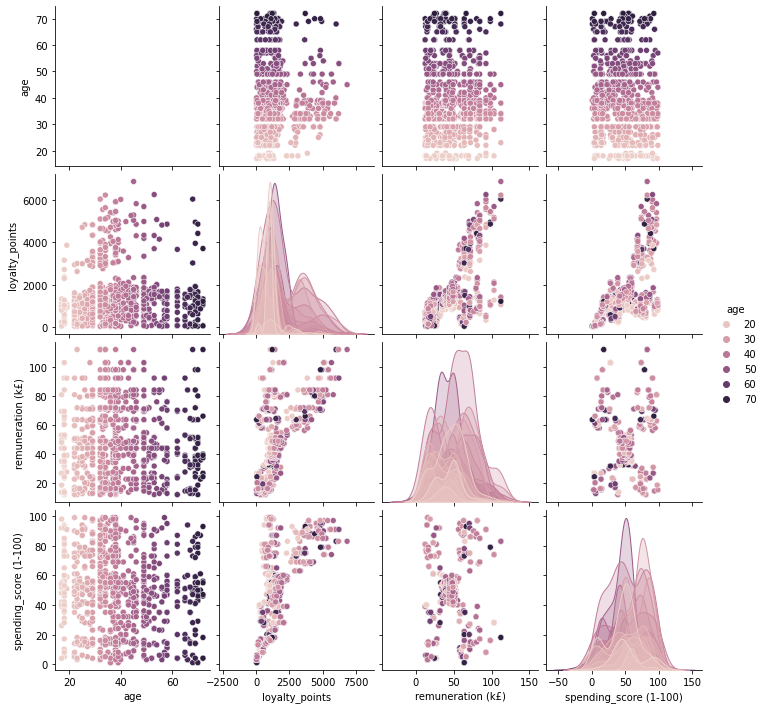

In [50]:
# Create a pairplot with Seaborn.
x = df_tut[['age', 'loyalty_points', 'remuneration (k£)', 'spending_score (1-100)']]

sns.pairplot(df_tut, vars = x, hue='age',
             diag_kind='kde')

In [43]:
# Descriptive statistics.
df_tut.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [44]:
df_tut.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')

## 2. Drop columns

In [45]:
# Drop unnecessary columns.
df_tut.drop(['language', 'platform'], axis=1, inplace=True)



In [112]:
#check df cols
df_tut.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [8]:
# Rename the column headers.
tut_final = df_tut.rename(columns={'remuneration (k£)':'renumeration', 'spending_score (1-100)':'spending_score'})
#Check col names
tut_final.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'language', 'platform', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
tut_final.to_csv('df_turtle')

In [10]:
# Import new CSV file with Pandas.
df_turtle = pd.read_csv('df_turtle')

# reset index
df_turtle.reset_index(drop=True)
# drop unnamed index
df_turtle.drop(['Unnamed: 0'], axis=1, inplace=True)
# View DataFrame.
df_turtle.head(3)

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   

  language platform  product  \
0       EN      Web      453   
1       EN      Web      466   
2       EN      Web      254   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless

## 5. Linear regression

### 5a) spending vs loyalty

<Axes: xlabel='spending_score', ylabel='loyalty_points'>

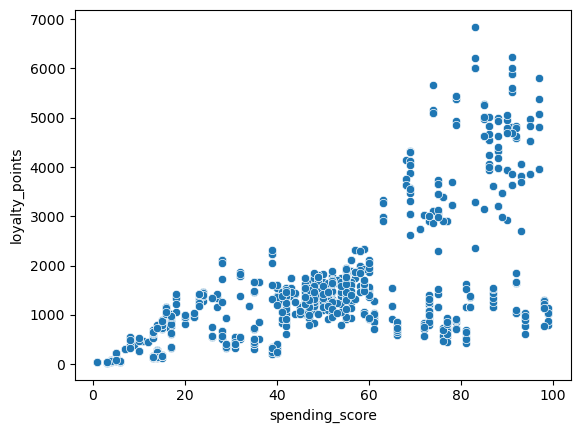

In [12]:
#create a subset of turtle df
df2 = df_turtle[['spending_score', 'loyalty_points']]

#Check the data points distribution
sns.scatterplot(data=df2,
               x='spending_score',
               y='loyalty_points')



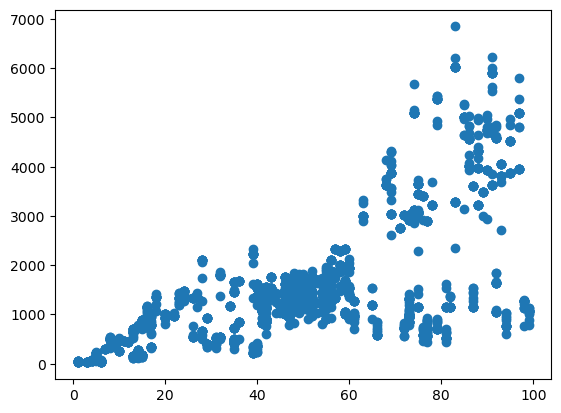

In [13]:
# Independent variable.
x = df2['spending_score'] 

# Dependent variable.
y = df2['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [14]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df2).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        23:29:53   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Create the linear regression model.
# Set the the coefficient to -75.052663 and the constant to -33.061693.
y_pred = (-75.052663) + 33.061693 * df2['spending_score']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

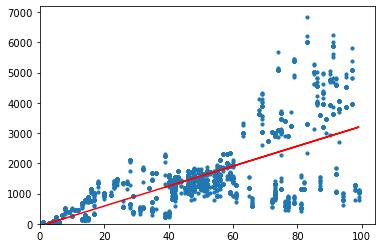

In [95]:
# Plot the data points with a scatterplot.
plt.scatter(x, y, s=10)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<Axes: xlabel='renumeration', ylabel='loyalty_points'>

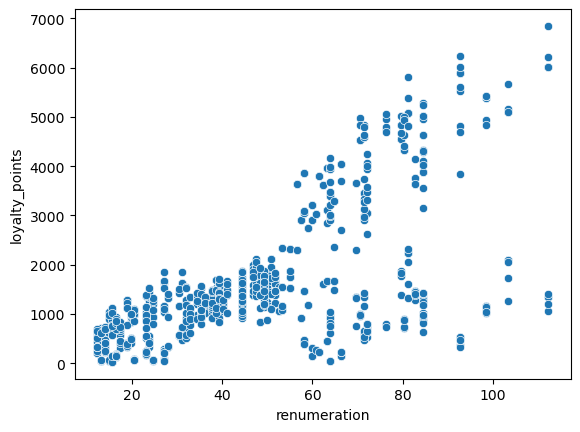

In [17]:
#create a subset of turtle df
df3 = df_turtle[['renumeration', 'loyalty_points']]

#Check the data points distribution
sns.scatterplot(data=df3,
               x ='renumeration',
               y ='loyalty_points')




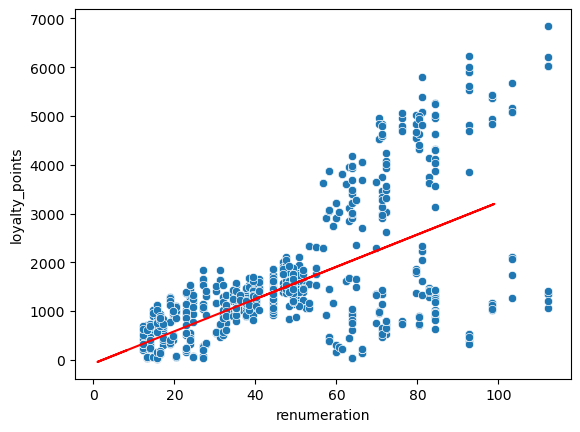

In [19]:
df3 = df_turtle[['renumeration', 'loyalty_points']]

#Check the data points distribution
sns.scatterplot(data=df3,
               x ='renumeration',
               y ='loyalty_points')
#create a linear regression line
plt.plot(x, y_pred, color='red')

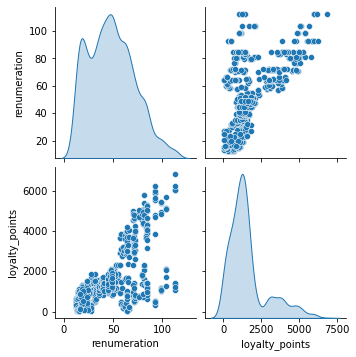

In [99]:
#sense-check the comparision between dependent and independent
sns.pairplot(df3,
             diag_kind='kde')

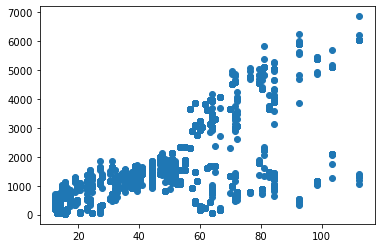

In [100]:
# Independent variable.
x = df3['renumeration'] 

# Dependent variable.
y = df3['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

In [101]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = df3).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          2.43e-209
Time:                        02:58:51   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [103]:
# Create the linear regression model.
# Set the the coefficient to -65.686513 and the constant to 34.187825.
y_pred = (-65.686513) + 34.187825 * df3['renumeration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

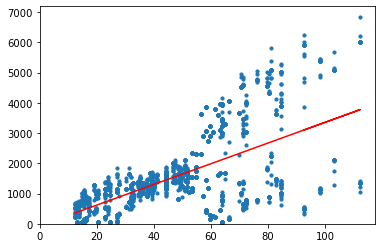

In [104]:
# Plot the data points with a scatterplot.
plt.scatter(x, y, s=10)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

<AxesSubplot:xlabel='age', ylabel='loyalty_points'>

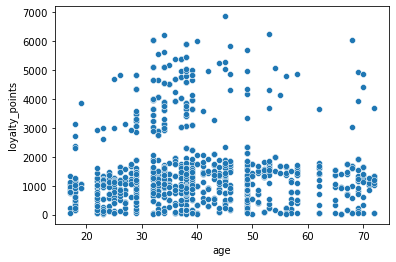

In [107]:
#create a subset of turtle df
df4 = df_turtle[['age', 'loyalty_points']]

#Check the data points distribution
sns.scatterplot(data=df4,
               x ='age',
               y ='loyalty_points')


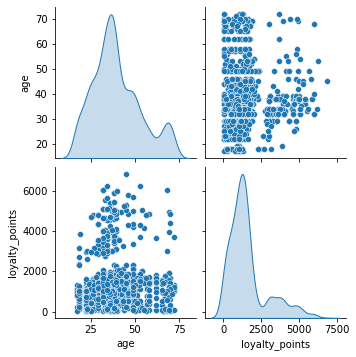

In [108]:
#sense-check the comparision between dependent and independent
sns.pairplot(df4,
             diag_kind='kde')

In [109]:
# Extract the estimated parameters.
# Independent variable.
x = df4['age'] 

# Dependent variable.
y = df4['loyalty_points']



# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict()) 




Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [110]:
# Create the linear regression model.
# Set the the coefficient to -65.686513 and the constant to 34.187825.
y_pred = (-65.686513) + 34.187825 * df4['age']

# View the output.
y_pred

# View the output.


0        549.694337
1        720.633462
2        686.445637
3        789.009112
4       1062.511712
           ...     
1995    1199.263012
1996    1404.389962
1997    1096.699537
1998    1096.699537
1999    1028.323887
Name: age, Length: 2000, dtype: float64

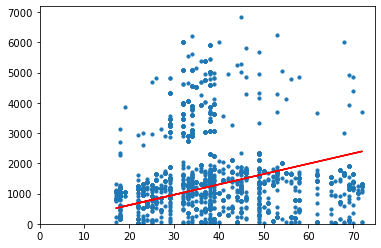

In [111]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y, s=10)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()


## 6. Observations and insights

***Your observations here...***






In [ ]:
Comparision between age and loyalty input variables did not give the best 
analysis to the turtle data. Further analysis needs to be carried out on other variables to determine relationships and 
dependance.




# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [ ]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [113]:
# Load the CSV file(s) as df2.
df2_t = df_turtle

# View DataFrame.
df2_t.head(3)

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless

In [217]:
# Drop unnecessary columns.
x = df2_t[['renumeration', 'spending_score', 'gender']]
df2_fin = df2_t[['renumeration', 'spending_score']]

# View DataFrame.
df2_fin.head(3)

renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6

In [218]:
# Explore the data.


In [219]:
# Descriptive statistics.
print(df2_fin.info())
df2_fin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

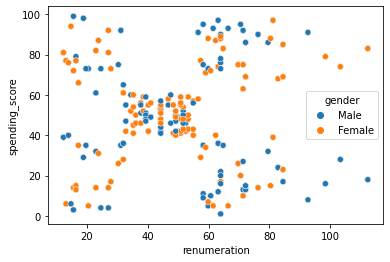

In [220]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data = x, x='renumeration', y='spending_score', hue = 'gender')

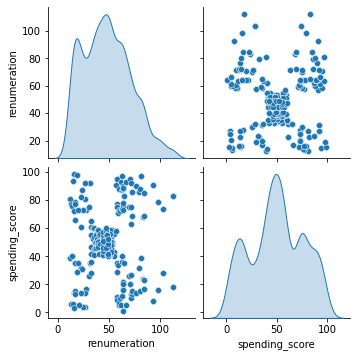

In [221]:
# Create a pairplot with Seaborn.
sns.pairplot(df2_fin,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

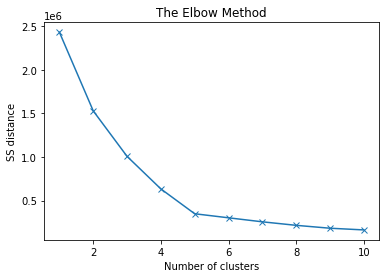

In [222]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=900,
                    n_init=10,
                    random_state=42)
    kmeans.fit(df2_fin)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='x')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()


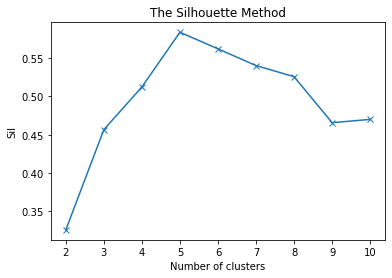

In [223]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2_fin)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2_fin,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='x')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

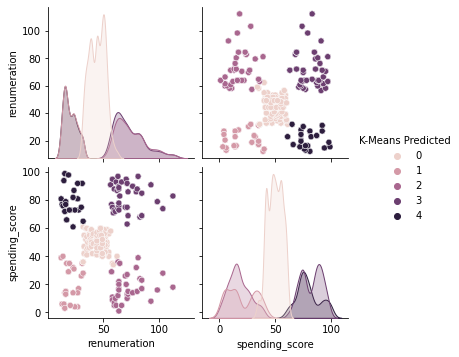

In [224]:
# Use five k clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(df2_fin)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [225]:
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

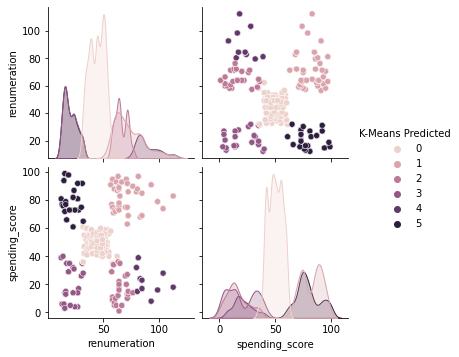

In [226]:
# Use 6 clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 300,
                init='k-means++',
                random_state=0).fit(df2_fin)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [227]:
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

In [247]:
# Apply the final model applying log  reg.
z= x.copy()
z.head(2)

renumeration  spending_score gender  K-Means Predicted
0          12.3              39   Male                  3
1          12.3              81   Male                  5

<AxesSubplot:xlabel='gender', ylabel='count'>

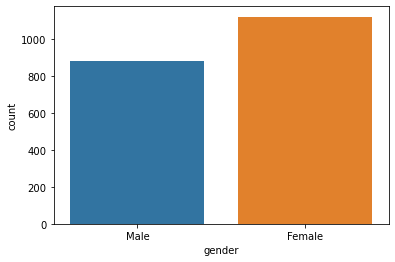

In [248]:
sns.countplot(x='gender', data=z)

In [249]:
y = z['gender']

In [255]:
X_data = z.drop(['gender'], axis = 1)
X_data.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

renumeration  spending_score  K-Means Predicted
0          12.30              39                3.0
1          13.12              81                5.0
2          13.94               6                0.0
3          14.76              77                1.0
4          15.58              40                2.0
..           ...             ...                ...
79           NaN              68                NaN
80           NaN              85                NaN
81           NaN              23                NaN
82           NaN               8                NaN
83           NaN              18                NaN

[84 rows x 3 columns]

In [258]:
X_data.isnull().sum()
X_data.fillna(0, inplace=True)

In [261]:
X_data.head()

renumeration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  5
2         13.12               6                  3
3         13.12              77                  5
4         13.94              40                  3

In [262]:
#Normalise the data with min and max feature scale
X = (X_data -np.min(X_data))/(np.max(X_data)-np.min(X_data)).values
print(x)

      renumeration  spending_score  gender  K-Means Predicted
0            12.30              39    Male                  3
1            12.30              81    Male                  5
2            13.12               6  Female                  3
3            13.12              77  Female                  5
4            13.94              40  Female                  3
...            ...             ...     ...                ...
1995         84.46              69  Female                  1
1996         92.66               8  Female                  4
1997         92.66              91    Male                  1
1998         98.40              16    Male                  4
1999         92.66               8    Male                  4

[2000 rows x 4 columns]


In [263]:
##Eliminate multicollinearity
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

# View the DataFrame.
vif_data.sort_values('VIF',ascending=True)


feature       VIF
2  K-Means Predicted  1.569872
0       renumeration  2.236478
1     spending_score  2.719280

In [264]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 


# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balance the training data.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 
os_data_y = pd.DataFrame(data = os_data_y, columns = ['gender'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   renumeration  spending_score  K-Means Predicted
0      0.155738        0.163265                0.6
1      0.598361        0.867347                0.2
2      0.516393        0.785714                0.2
3      0.147541        0.816327                1.0
4      0.524590        0.346939                0.4


gender
0  Female
1  Female
2  Female
3  Female
4  Female

In [265]:
#Check the data is balanced
os_data_y.value_counts()

gender
Female    795
Male      795
dtype: int64

In [266]:
##Create the BLR model

In [267]:
# Import the necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Set LogisticRegression() to logreg.
logreg_model = LogisticRegression(max_iter=1000) 

# Fit the X_train and y_train data sets to logreg. 
logreg_model.fit(os_data_X, os_data_y.values.ravel()) 


LogisticRegression(max_iter=1000)

In [268]:
# Determine BLR model's accuracy.
y_pred = logreg_model.predict(X_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(acc))


Accuracy of logistic regression classifier on test set: 0.49


In [270]:
# Create the confusion matrix to test classification accuracy in BLR.
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)

confusion = pd.DataFrame(confusion_matrix, index=['High Earn', 'Low Earn'],
                         columns=['predicted_High_Earn', 'predicted_low_Earn'])

# View the output.
confusion


predicted_High_Earn  predicted_low_Earn
High Earn                  173                 152
Low Earn                   155                 120

In [ ]:
# Check the number of observations per predicted class.


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='renumeration', ylabel='spending_score'>

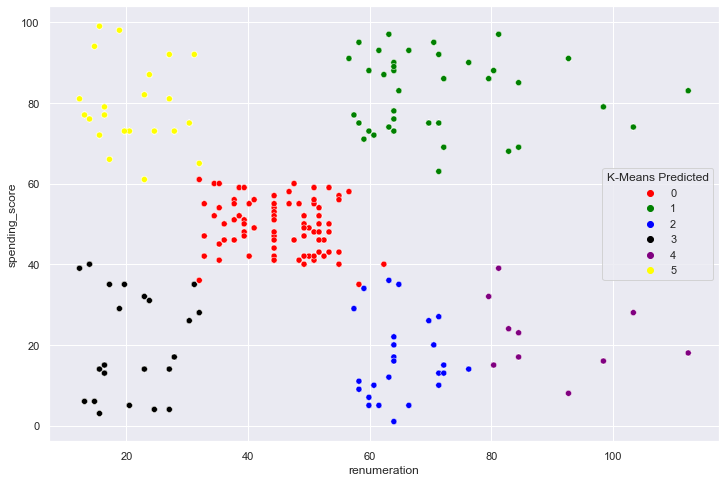

In [274]:
# Visualising the clusters.

# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'purple','yellow'])




In [ ]:
##SVM model

In [278]:
# Import the SVM package.
from sklearn import svm

# Create an SVM Classifier.
clf = svm.SVC(kernel='linear', gamma='scale') 

# Train the model using the training sets.
clf.fit(X, y)

# Predict the response for the test data set.
y_pred = clf.predict(X_test)

In [279]:
# Import necessary packages.
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)

confusion = pd.DataFrame(confusion_matrix, index=['High Earn', 'Low Earn'],
                         columns=['predicted_High_Earn', 'predicted_low_Earn'])
# View the output.
confusion

predicted_High_Earn  predicted_low_Earn
High Earn                  325                   0
Low Earn                   275                   0

In [280]:
# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.54      1.00      0.70       325
        Male       0.00      0.00      0.00       275

    accuracy                           0.54       600
   macro avg       0.27      0.50      0.35       600
weighted avg       0.29      0.54      0.38       600



In [ ]:
##Random Regressor

In [281]:
# Import the random forest regressor class.
from sklearn.ensemble import RandomForestRegressor 

# Create the regressor object.
regressor = RandomForestRegressor(n_estimators=5, 
                                  random_state=42, 
                                  n_jobs=2)

# Fit the regressor to the data set, and predict the y variable.
regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'Female'

In [ ]:
# View the DataFrame.
regressor.head()

## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
Accuracy of this model is low as predicted chance of big earners to spend
compared to what was spent had a low accuracy of 49%.

Other models will need to be tried after refining the variables used for this 
analysis. Other variable relationships needs to be analysed.

MLR was used on this occasion as I am analysing multiple variables
which are dependant on themselves such as spending_points to renumeration.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the CSV file(s) as reviews.
df_tut = pd.read_csv('turtle_reviews.csv')
# View the DataFrame.
df_tut.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [5]:
# Explore data set.
#Create a subset of the 'tutle review'
tut_sub = df_tut[['review','summary']]
# View DataFrame.
tut_sub.head(3)

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless

In [6]:
#check the shape
tut_sub.shape


(2000, 2)

In [7]:
# Determine if there are any missing values.
tut_sub.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [10]:
# Summary: Change all to lower case and join with a space.
# Review: Change all to lower case and join with a space.
tut_sub['review_new'] = tut_sub['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
tut_sub['summary_new'] = tut_sub['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tut_sub.head(3)

In [16]:
# String all the comments together in a single variable for summary.
# Create an empty string variable.
summary_all = ''
for i in range(tut_sub.shape[0]):
    # Add each comment.
    summary_all = summary_all + tut_sub['summary_new'][i]

In [12]:
tut_sub.head(3)

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   

                                          review_new  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   

                                         summary_new  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless

In [14]:
# String all the comments together in a single variable for review.
# Create an empty string variable.
review_all = ''
for i in range(tut_sub.shape[0]):
    # Add each comment.
    review_all = review_all + tut_sub['review_new'][i]

In [15]:
review_all

'when it comes to a dm\'s screen, the space on the screen itself is at an absolute premium. the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. the only reason that i gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. other than that, it drops the ball completely.an open letter to galeforce9*: your unpainted miniatures are very not bad. your spell cards are great. your board games are "meh". your dm screens, however, are freaking terrible. i\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. once again, you\'ve created a single use screen that is only useful when running the "storm king\'s thunder" adventure. even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. i massive swath of the inner panel is wasted on art

In [17]:
summary_all

'the fact that 50% of this space is wasted on art (and not terribly informative or needed art ...another worthless dungeon master\'s screen from galeforce9pretty, but also pretty uselessfive starsmoney trapfive starsbest gm screen everfive starsgreat but could be even betteranother missed opportunity. not a value add to the product line.five starslove the map!not a general dm screenvery weak gamefell completely flat...five starsgood bookbuckley was a card mommervery advanced, but as good as it getsyou better know what you\'re getting intodon\'t botherthe worst value i\'ve ever seennot enough productgood product but...temporary tattoos were good gift.huge hitgorgeous pictures!five starswonderful designs.wow, great coloring book!!!!!!nice bookgreat picturesperfect!well done....my relaxationbeautiful coloring bookthe pictures are great, i\'ve done one and gave it to a ...great buy! can\'t wait to work on this bookstained glass perfection!four starsso beautiful!great picturesvery nice!five

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [18]:
# Replace all the punctuations in review column.
import re
# Filter out the specified punctuation.
review_all = re.sub(r"[\.\?\!\,\:\;\"]", '', review_all)


# View output.
review_all

"when it comes to a dm's screen the space on the screen itself is at an absolute premium the fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completelyan open letter to galeforce9* your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible i'm still waiting for a single screen that isn't polluted with pointless artwork where useful reference-able tables should be once again you've created a single use screen that is only useful when running the storm king's thunder adventure even despite the fact that it's geared to that adventure path it's usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map w

In [19]:
# Replace all the puncuations in summary column.
# Filter out the specified punctuation.
summary_all = re.sub(r"[\.\?\!\,\:\;\"]", '', summary_all)


# View output.
summary_all

"the fact that 50% of this space is wasted on art (and not terribly informative or needed art another worthless dungeon master's screen from galeforce9pretty but also pretty uselessfive starsmoney trapfive starsbest gm screen everfive starsgreat but could be even betteranother missed opportunity not a value add to the product linefive starslove the mapnot a general dm screenvery weak gamefell completely flatfive starsgood bookbuckley was a card mommervery advanced but as good as it getsyou better know what you're getting intodon't botherthe worst value i've ever seennot enough productgood product buttemporary tattoos were good gifthuge hitgorgeous picturesfive starswonderful designswow great coloring booknice bookgreat picturesperfectwell donemy relaxationbeautiful coloring bookthe pictures are great i've done one and gave it to a great buy can't wait to work on this bookstained glass perfectionfour starsso beautifulgreat picturesvery nicefive starsfive starsfive starsfive starsfive st

### 2c) Drop duplicates in both columns

In [30]:
#Check for duplicates
tut_sub[['review_new', 'summary_new']].duplicated().sum()

# Drop duplicates in both columns.
tutle = tut_sub.drop_duplicates(subset = ['review_new', 'summary_new'])
tutle.reset_index(inplace = True)


# View DataFrame.
tutle.head(3)

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   

                                          review_new  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   

                                         summary_new  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless

In [32]:
#Check for duplicates
tutle[['review_new', 'summary_new']].duplicated().sum()


0

## 3. Tokenise and create wordclouds

In [34]:
# Create new DataFrame (copy DataFrame).
tut_new = tutle.copy()

# View DataFrame.
tut_new.head(3)

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   

                                          review_new  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   

                                         summary_new  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless

In [35]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/kay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# Apply tokenisation to both columns.
# Tokenise the words.
tut_new['review_tokens'] = tut_new['review_new'].apply(word_tokenize)
tut_new['summary_tokens'] = tut_new['summary_new'].apply(word_tokenize)

# View DataFrame.
tut_new[['review_tokens','summary_tokens']].head()




review_tokens  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   
3  [amazing, buy, !, bought, it, as, a, gift, for...   
4  [as, my, review, of, gf9, 's, previous, screen...   

                                      summary_tokens  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [38]:
# Import along with matplotlib and seaborn for visualisation.
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [39]:
# Review: Create a word cloud.
# Set the colour palette.
sns.set(color_codes = True)
# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_all)

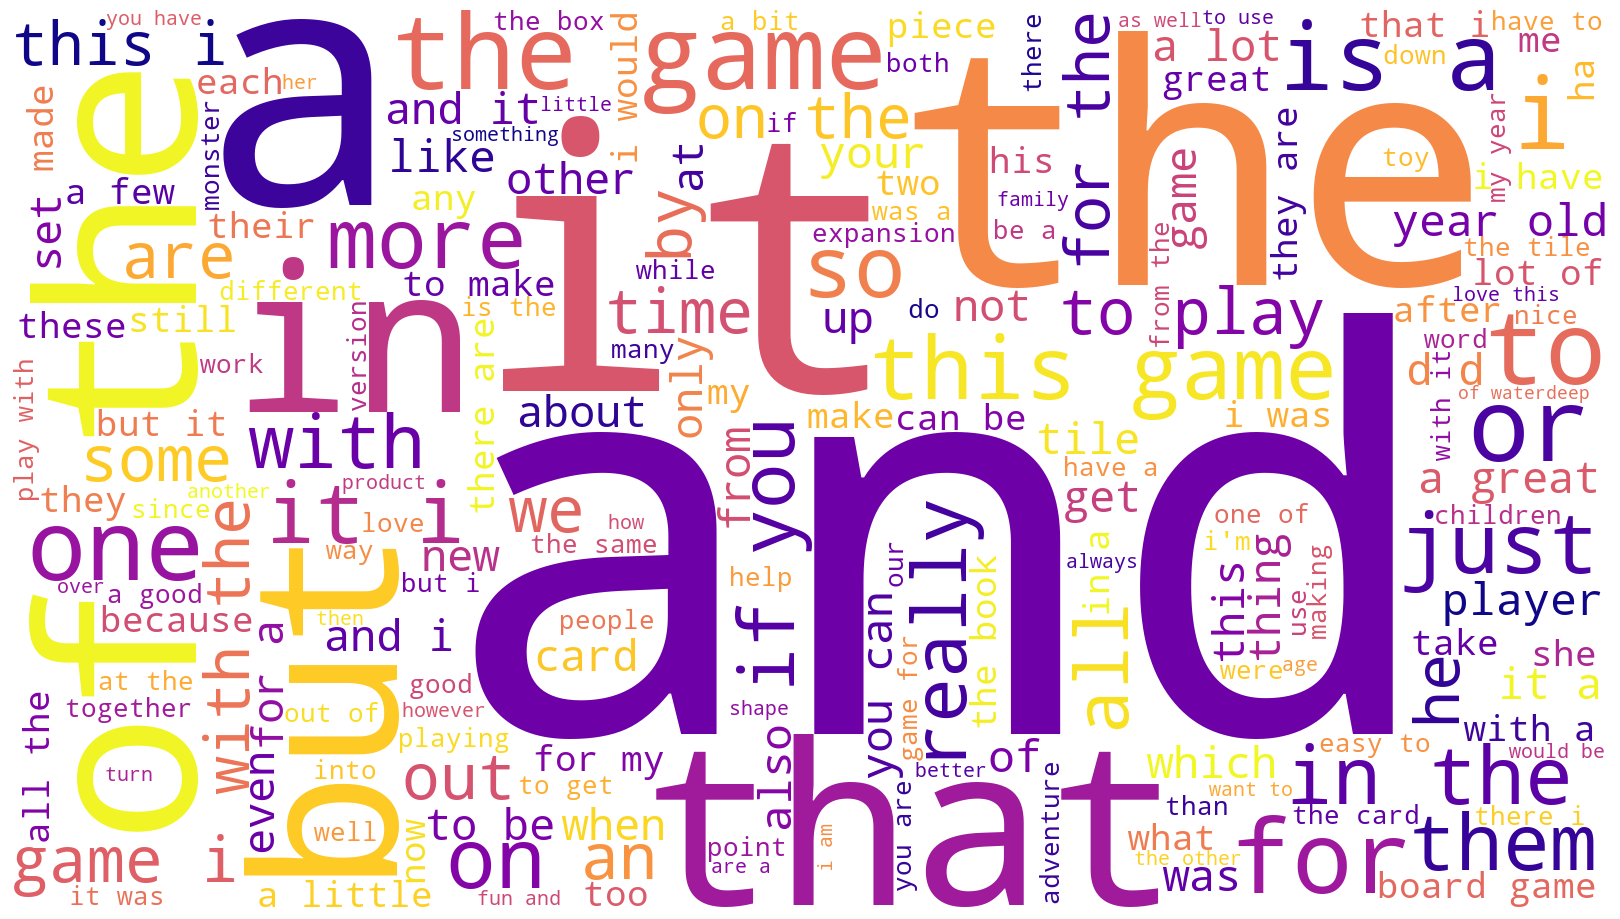

In [40]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [42]:
# Summary: Create a word cloud.
# Set the colour palette.
sns.set(color_codes = True)
# Create a WordCloud object.
word_cloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_all)

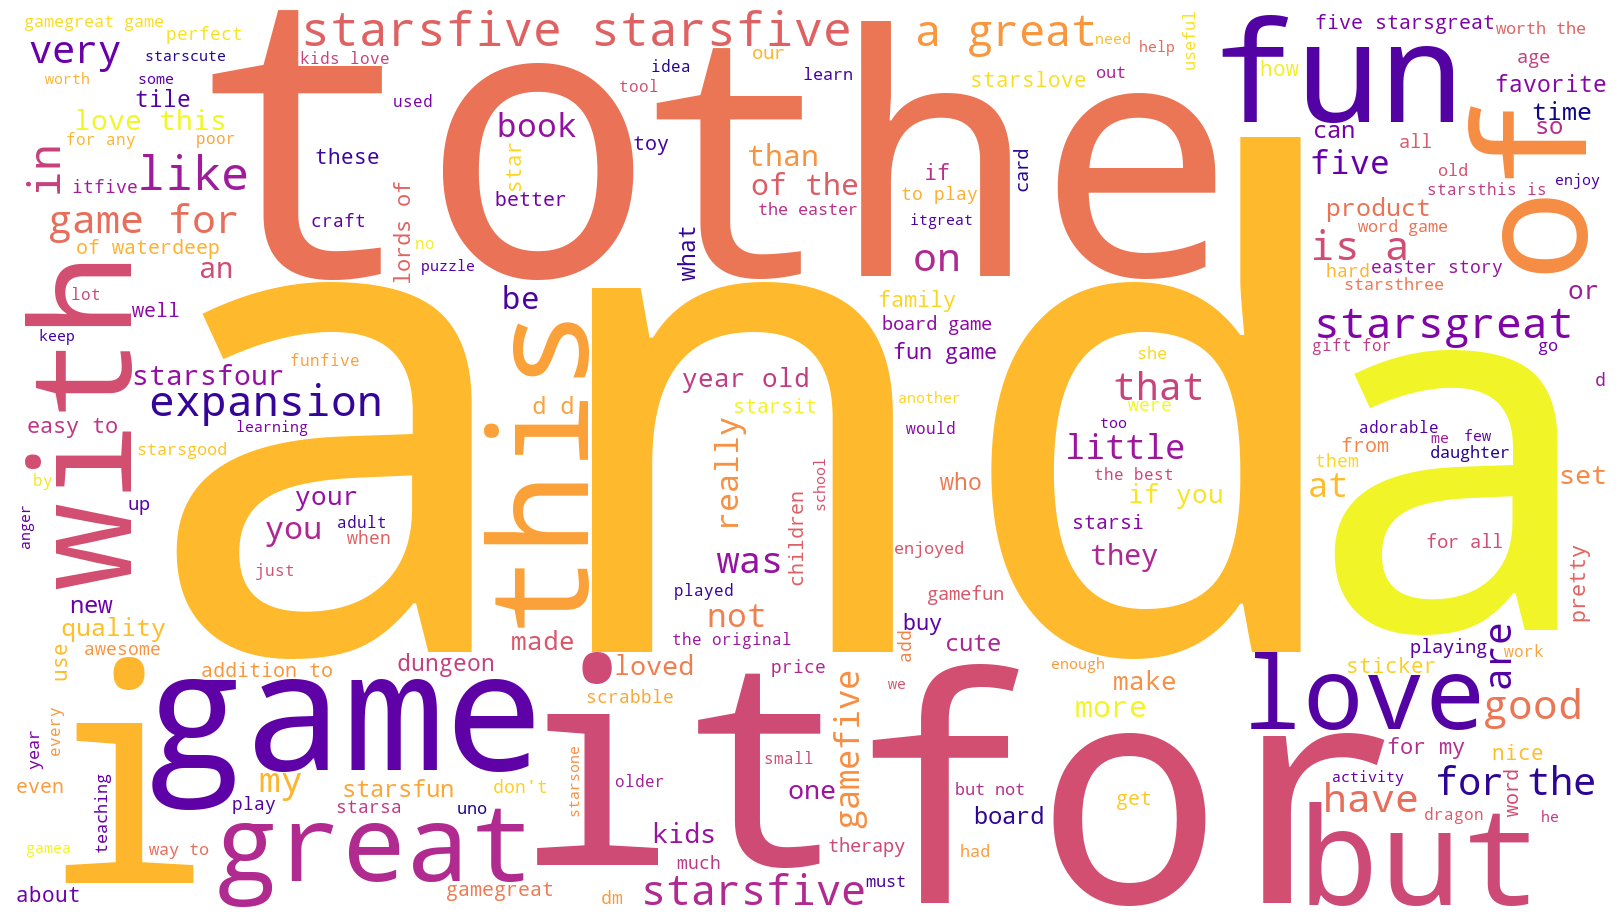

In [43]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [50]:
# Define an empty list of review tokens.
all_rev_tokens = []

for i in range(tut_new.shape[0]):
    # Add each token to the list.
    all_rev_tokens = all_rev_tokens + tut_new['review_tokens'][i]

In [51]:
# Define an empty list of review tokens.
all_summ_tokens2 = []

for i in range(tut_new.shape[0]):
    # Add each token to the list.
    all_summ_tokens2 = all_summ_tokens2 + tut_new['summary_tokens'][i]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [52]:
# Determine the review frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
rev_fdist = FreqDist(all_rev_tokens)

# Preview data.
rev_fdist

FreqDist({'.': 6470, 'the': 5457, ',': 3793, 'and': 3247, 'a': 3169, 'to': 3163, 'of': 2491, 'it': 2488, 'i': 2345, 'is': 1834, ...})

In [54]:
# Determine the summary frequency distribution.

# Calculate the frequency distribution.
summ_fdist = FreqDist(all_summ_tokens2)

# Preview data.
summ_fdist

FreqDist({'stars': 441, '!': 426, 'five': 356, 'game': 318, 'great': 294, 'the': 261, 'a': 239, 'for': 232, '.': 218, 'fun': 217, ...})

In [55]:
tut_new.head(3)

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   

                                          review_new  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   

                                         summary_new  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   

                                       review_tokens  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   

                                      summary_tokens  
0  [the, fact, that, 50, %, of, this, space, is, ...  
1  [another, worthless, dungeon, master, 's, scre...  
2            [pretty, ,, but, also, pretty, useless]

### 4b) Remove alphanumeric characters and stopwords

In [56]:
# Delete all the alpanum.
# Filter out tokens that are neither alphabets nor numbers (to eliminate punctuation marks, etc.).
tokens_rev = [word for word in all_rev_tokens if word.isalnum()]

In [57]:
tokens_sum = [word for word in all_summ_tokens2 if word.isalnum()]

In [60]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered review list of tokens without stopwords.
tokens_rev2 = [x for x in tokens_rev if x.lower() not in english_stopwords]

# Define an empty review string variable.
tokens_rev2_string = ''

for value in tokens_rev:
    # Add each filtered token word to the string.
    tokens_rev2_string = tokens_rev2_string + value + ' '

[nltk_data] Downloading package stopwords to /Users/kay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Create a filtered summary list of tokens without stopwords.
tokens_sum2 = [x for x in tokens_sum if x.lower() not in english_stopwords]

# Define an empty review string variable.
tokens_sum2_string = ''

for value in tokens_sum:
    # Add each filtered token word to the string.
    tokens_sum2_string = tokens_sum2_string + value + ' '

### 4c) Create wordcloud without stopwords

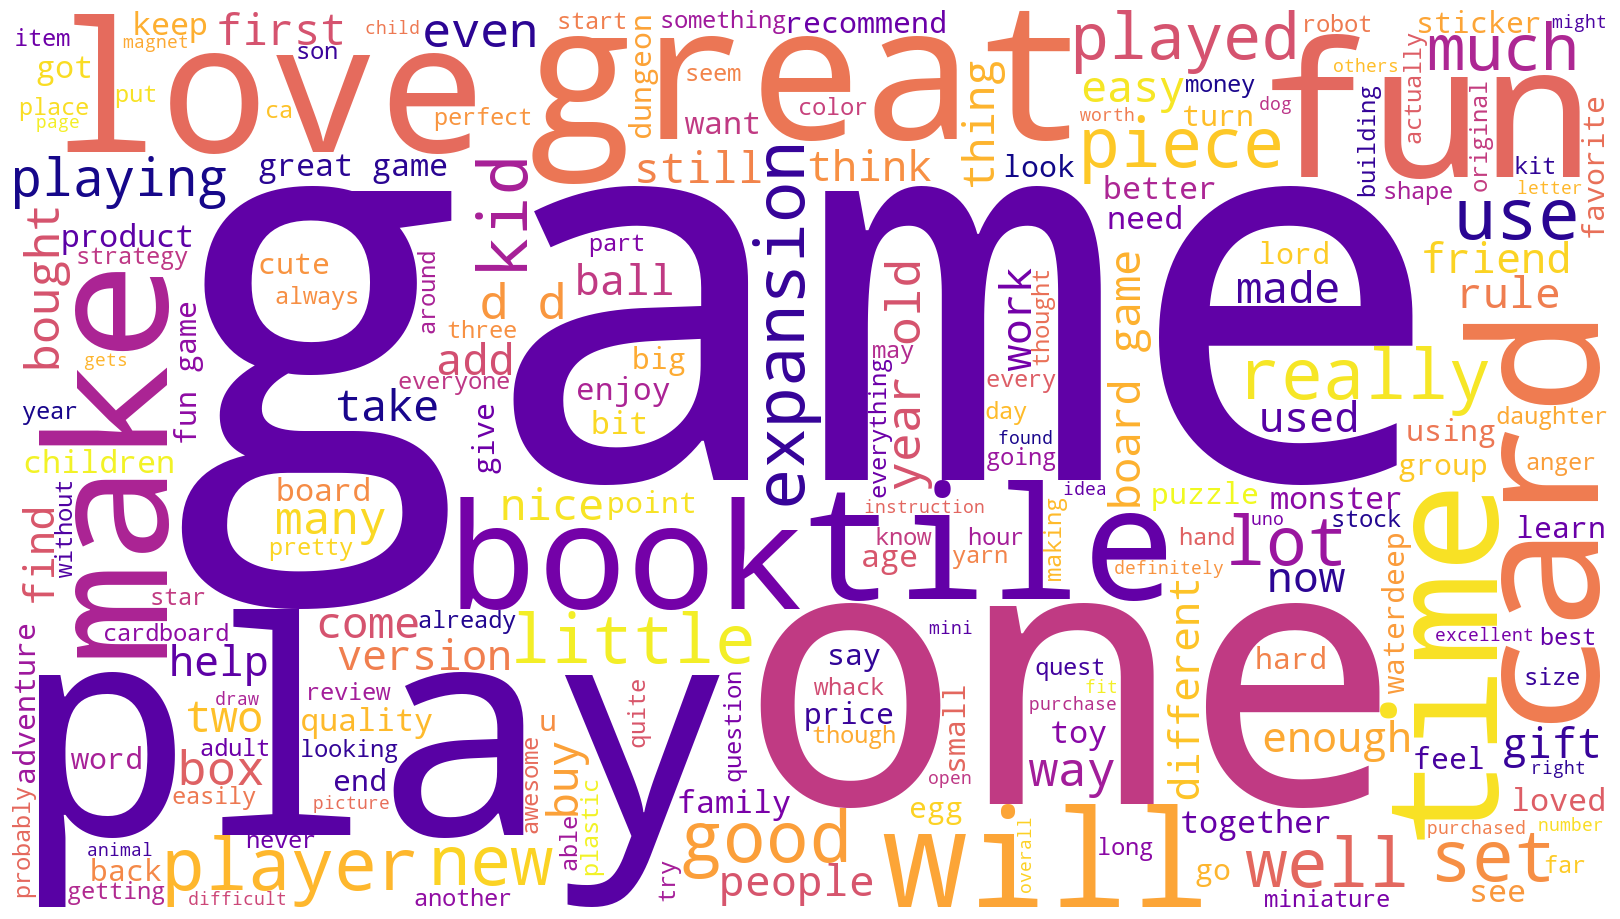

In [62]:
# Create a review wordcloud without stop words.
# Create a WordCloud.
wordcloud_rev = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_rev2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_rev) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

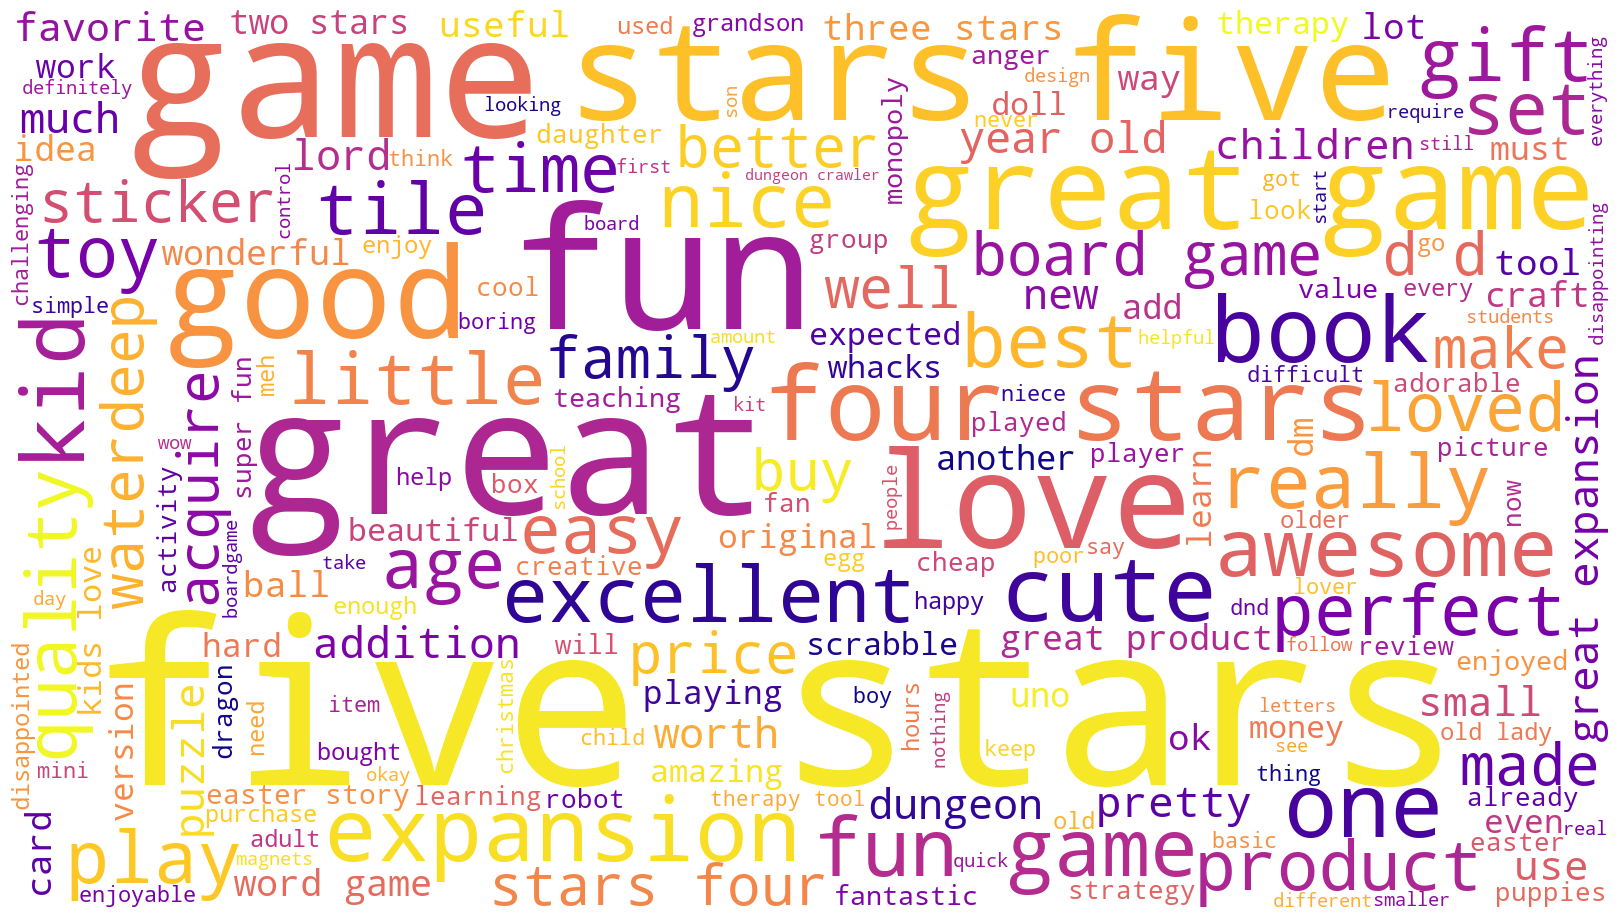

In [63]:
# Plot the summary wordcloud image.
wordcloud_summ = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_sum2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_summ) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [64]:
# Determine the 15 most common reviewed words.
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
rev_counts = pd.DataFrame(Counter(tokens_rev2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
rev_counts

Frequency
Word             
game         1693
great         587
fun           555
one           532
play          504
like          414
love          325
get           320
really        318
cards         301
would         301
tiles         298
time          292
good          290
book          278

In [65]:
# Generate a DataFrame from Counter.
sum_counts = pd.DataFrame(Counter(tokens_sum2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
sum_counts

Frequency
Word                
stars            441
five             356
game             318
great            294
fun              217
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               39
awesome           36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [72]:
tut_new.head(3)

index                                             review  \
0      0  When it comes to a DM's screen, the space on t...   
1      1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      2  Nice art, nice printing.  Why two panels are f...   

                                             summary  \
0  The fact that 50% of this space is wasted on a...   
1  Another worthless Dungeon Master's screen from...   
2                    pretty, but also pretty useless   

                                          review_new  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   

                                         summary_new  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   

                                       review_tokens  \
0  [when, it, comes, to, a, dm, 's, screen, ,, th...   
1  [an, open, letter, to, galeforce9, *, :, your,...   
2  [nice, art, ,, nice, printing, ., why, two, pa...   

                                      summary_tokens  polarity_rev  \
0  [the, fact, that, 50, %, of, this, space, is, ...     -0.036111   
1  [another, worthless, dungeon, master, 's, scre...      0.035952   
2            [pretty, ,, but, also, pretty, useless]      0.116640   

   polarity_sum  
0          0.15  
1         -0.80  
2          0.00

In [67]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [70]:
# Determine polarity of review columns. 
# Populate a new column with polarity scores for each review.
tut_new['polarity_rev'] = tut_new['review_new'].apply(generate_polarity)

# View output.
tut_new['polarity_rev'].head()




0   -0.036111
1    0.035952
2    0.116640
3    0.628788
4   -0.316667
Name: polarity_rev, dtype: float64

In [71]:
# Determine polarity of summary columns. 
# Populate a new column with polarity scores for each summary.
tut_new['polarity_sum'] = tut_new['summary_new'].apply(generate_polarity)

# View output.
tut_new['polarity_sum'].head()


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_sum, dtype: float64

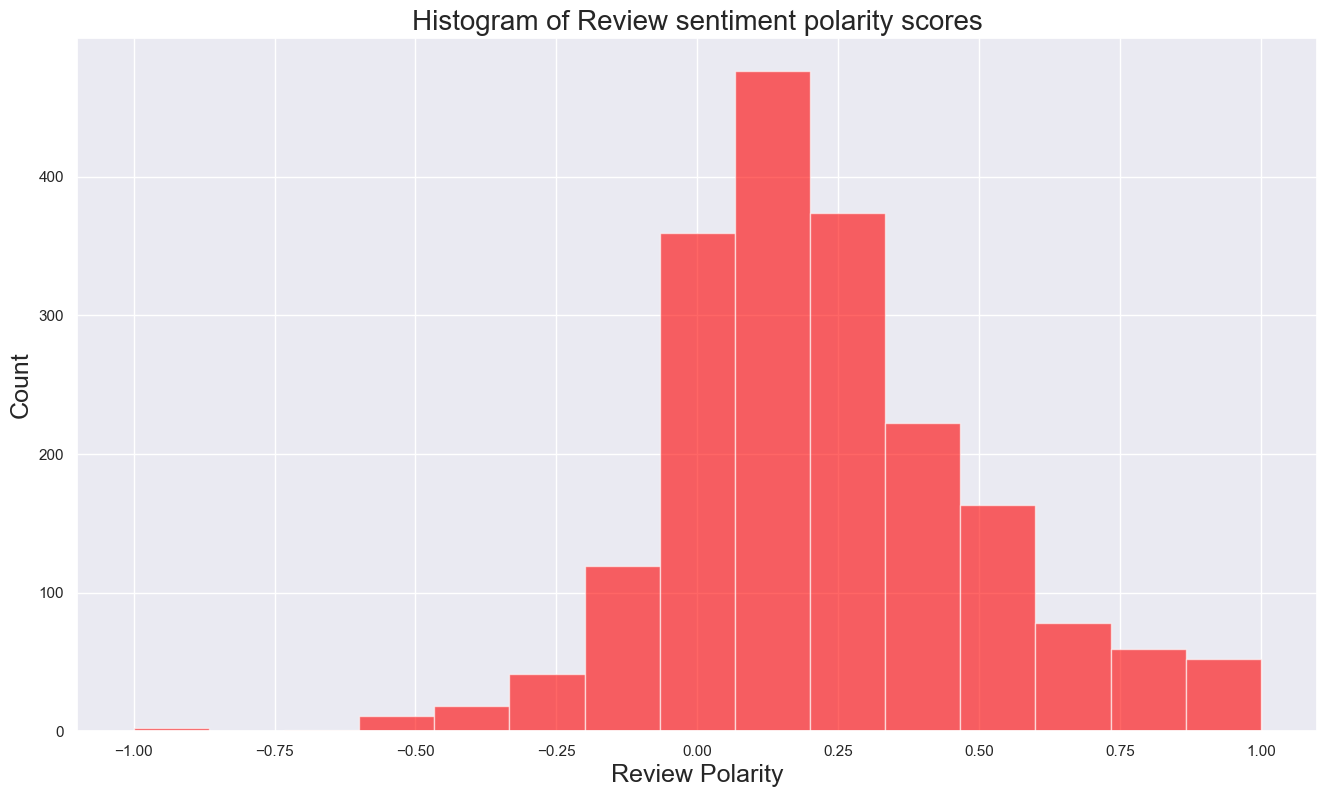

In [74]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15
# Histogram of polarity
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tut_new['polarity_rev'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of Review sentiment polarity scores', fontsize=20)

plt.show()

# Histogram of sentiment score


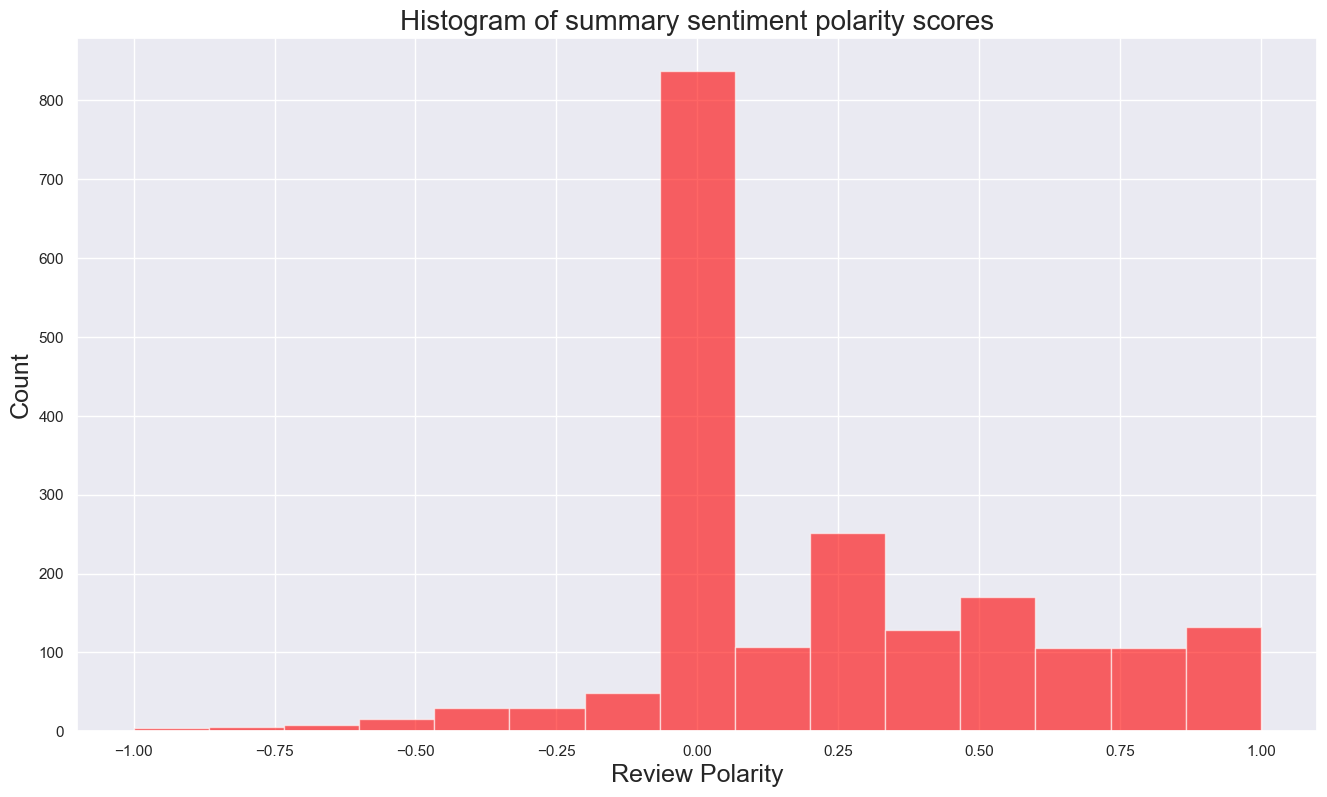

In [75]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Review: Create a histogram plot with bins = 15.
num_bins = 15
# Histogram of summary polarity
# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(tut_new['polarity_sum'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Review Polarity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of summary sentiment polarity scores', fontsize=20)

plt.show()

# Histogram of sentiment score


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [83]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = tut_new.nsmallest(20, 'polarity_rev')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review_new', 'polarity_rev']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['review_new'], **{'width': '1200px'})

# View output.


In [84]:
# Top 20 negative summaries.
# Top 20 negative reviews.
# Create a DataFrame.
neg_sum_sentiment = tut_new.nsmallest(20, 'polarity_sum')

# Eliminate unnecessary columns.
neg_sum_sentiment = neg_sum_sentiment[['summary_new', 'polarity_sum']]

# Adjust the column width.
neg_sum_sentiment.style.set_properties(subset=['summary_new'], **{'width': '1200px'})

# View output.


# View output.


In [85]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = tut_new.nlargest(20, 'polarity_rev')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review_new', 'polarity_rev']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review_new'], **{'width': '1200px'})


# View output.


In [87]:
# Top 20 positive summaries.

# Create a DataFrame.
pos_sum_sentiment = tut_new.nlargest(20, 'polarity_sum')

# Eliminate unnecessary columns.
pos_sum_sentiment = pos_sum_sentiment[['summary_new', 'polarity_sum']]

# Adjust the column width.
pos_sum_sentiment.style.set_properties(subset=['summary_new'], **{'width': '1200px'})


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
high neutral review compared to negative and positive reviews.
looking on the bright side, the NPS score will be high as 75%
and this is a good indicator to the business.

Outliers seen was left to give further understand the distribution
of the data.

Further analysis needs to be carried out to examine churn rate based on the NPS.
Additional data dimension needs to be gotten to understand the age groups and location of the 
customers. This will enable us to provide the right services, marketting strategies, and 
budget planning.

# 